# Bayesian Statistics Demo

This notebook is meant to be a quick demo of some of the main concepts of Bayesian statistics and some of the primary statistical methods that a Bayesian statistician uses.  The discussion follows Chapter 2 of Richard McElreath's book *Statistical Rethinking* 2nd Ed.

## Environment preliminaries

You will need many R packages to do Bayesian statistics.  Below are commands to install a `slim` version of the `rethinking` package that will work for the purposes of this demo but we will need to do some other work to do hardcore Bayesian stuff later.

The commands below are for a slim version of the `rethinking` package for your personal laptop or desktop computer.  It looks like the Colab `R` runtime comes with all dependencies out of the box but you will still need to install the `rethinking` package (the 2nd command below) before this notebook will run on Google Colab.  The good news is the installation only takes a couple of minutes to complete.  Note you will need to reinstall the `rethinking` package repeatedly for each runtime.

In [1]:
# This line will be required to install on a personal laptop
# install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))

In [2]:
# need this one for Google Colab
devtools::install_github("rmcelreath/rethinking@slim")

numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.2.0     ) [CRAN]
distribut... (NA -> 0.4.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.1     ) [CRAN]
abind        (NA -> 1.4-5     ) [CRAN]
posterior    (NA -> 1.5.0     ) [CRAN]
shape        (NA -> 1.4.6.1   ) [CRAN]
loo          (NA -> 2.7.0     ) [CRAN]
mvtnorm      (NA -> 1.2-4     ) [CRAN]
coda         (NA -> 0.19-4.1  ) [CRAN]


Installing 11 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior, shape, loo, mvtnorm, coda

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmprqw77N/remotesd656f5826b/rmcelreath-rethinking-cbcb8ba/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.13.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## One-parameter problem

We are going to focus on a one parameter problem and look at several approaches to attack the problem.  In the real world you will have multiple parameters and your models will be more complicated but the techniques will be the same---just more extended.


**Parameter of interest:**
$$
p = \text{proportion of Earth covered by water}
$$

Our **random experiment** will be to toss a physical model Earth globe and see whether it hits the ground on an area of water (W) or land (L). The idea is that if Earth is covered by proportion $p$ of water then we would expect the globe to land on water approximately $p$ proportion of the time in the long run. If $\text{water}=\text{Success}$, let
$$
W = \#\text{ successes in $n$ trials}
$$
Then $W$ has what is called a *binomial distribution* which we denote by $W\sim\text{binom(size = $n$, prob = $p$)}$ with
$$
\Pr(W=w) = \binom{n}{w} p^{w}(1 - p)^{n-w},\ w=0,1,2,\ldots,n.
$$

The `R` command to evaluate the binomial distribution is:

`dbinom(w, size = n, prob = p)`



## Prior distributions and Bayes' Rule

We know there is some water on the Earth ($p > 0$) and we know that the polar icecaps haven't melted yet ($p < 1$), so that is, we know that $0 < p < 1$.  A valid prior is any probability distribution on $[0,1]$ or $(0,1)$ that reflects our personal beliefs regarding the value of $p$ before having observed any data.

We next perform our random experiment to collect data.  Then we use **Bayes' Rule** to **update** our prior distribution to our **posterior distribution**, that is, our updated beliefs about $p$ after having observed the data.  Bayes' Rule looks like this in shorthand:
$$
\text{Posterior} \propto \text{Prior} \times \text{Likelihood}
$$

There are four (4) main ways to compute posteriors:

0. Mathematics/Calculus (analytical)
1. Grid approximation
2. Quadratic approximation
3. Markov Chain Monte Carlo

**Example.**  Suppose we do the globe experiment, and from tossing the globe 9 times we observe the data WLWWWLWLW, that is, six times it landed on `W` and 3 times it landed on `L`.  Therefore $n = 9$ and $w = 6$.


## Grid approximation

The idea is we set up a grid of values for $p$ on the range $[0,1]$, and then specify what we want the prior to be on those grid values.  Higher prior probability on a particular value of $p$ means we have higher prior belief that $p$ is that value.

Then we observe data and use Bayes' Rule to compute our posterior distribution on those grid values.  The code for it is pretty easy.

- Likelihood of $p$: given by the code $\text{dbinom(6, size = 9, prob = $p$)}$
  - the likelihood is a function of $p$
- Prior: Here we choose 20 equally spaced grid points.
  - make $p$ equally likely
  - experiment with different priors (we will look at 3 different priors)

Advantages of grid approximation are that you can use pretty much any prior distribution that you can imagine and the output is relatively easy to understand.  Some drawbacks are that the method doesn't extend easily to multi-parameter problems and the more complicated models can be computationally intensive, sometimes prohibitively so.


### Uniform prior

Let's start with a **uniform prior**.  This takes all values of $p$ to be equally likely.  Since we are using 20 grid points, each possible value of $p$ with have prior probability of $1/20$.

In [3]:
# define grid from 0 to 1
p_grid <- seq( from=0 , to=1 , length.out=20 )

# define prior, all equally likely
prior <- rep( 1 , 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

Now we will make a plot of our prior distribution.

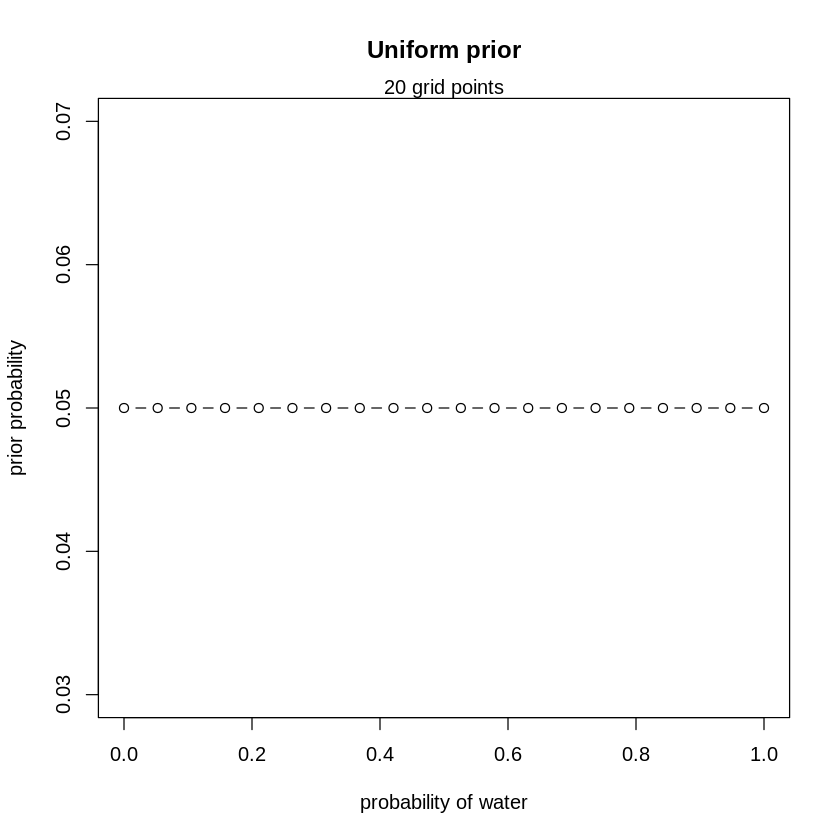

In [4]:
plot( p_grid , prior/sum(prior) , type="b" ,
    xlab="probability of water" , ylab="prior probability" ,
    main="Uniform prior")
mtext( "20 grid points" )

We see that our prior distribution is *uniformly* flat at the value 0.05.  Next, we will make a plot of our posterior distribution after observing water $w = 6$ times after tossing the globe $n = 9$ times.

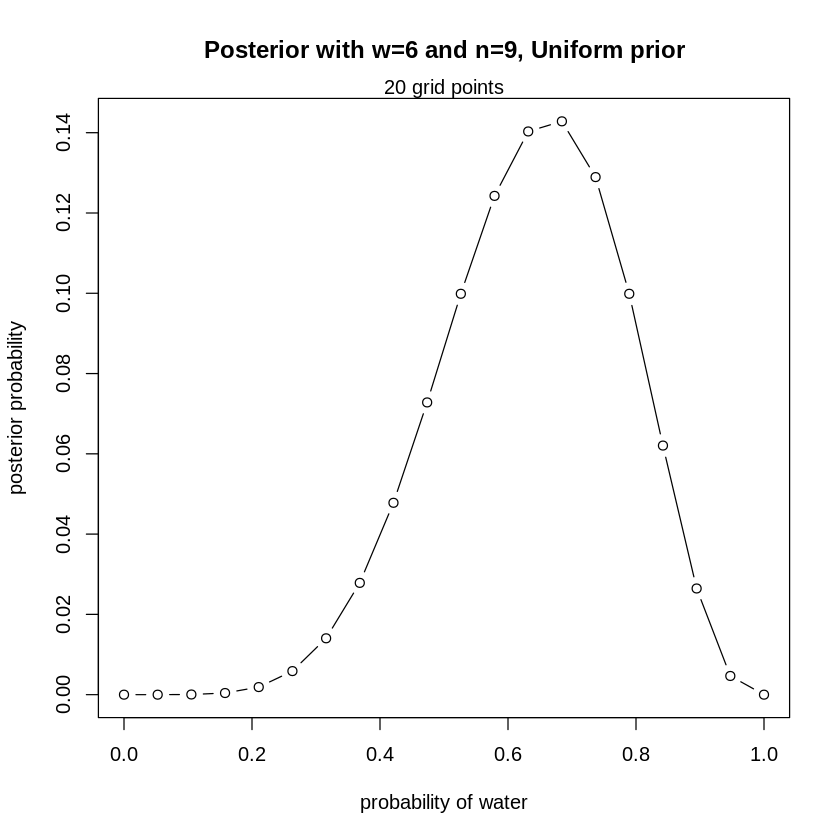

In [5]:
plot( p_grid , posterior , type="b" ,
    xlab="probability of water" , ylab="posterior probability",
    main = "Posterior with w=6 and n=9, Uniform prior")
mtext( "20 grid points" )

### Truncated uniform prior

Let's try a different prior, one that is truncated to put only prior probability on values of $p \geq 0.5$.

In [ ]:
# define truncated prior
prior <- ifelse( p_grid < 0.5 , 0 , 1 )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

Now let's plot the truncated prior.

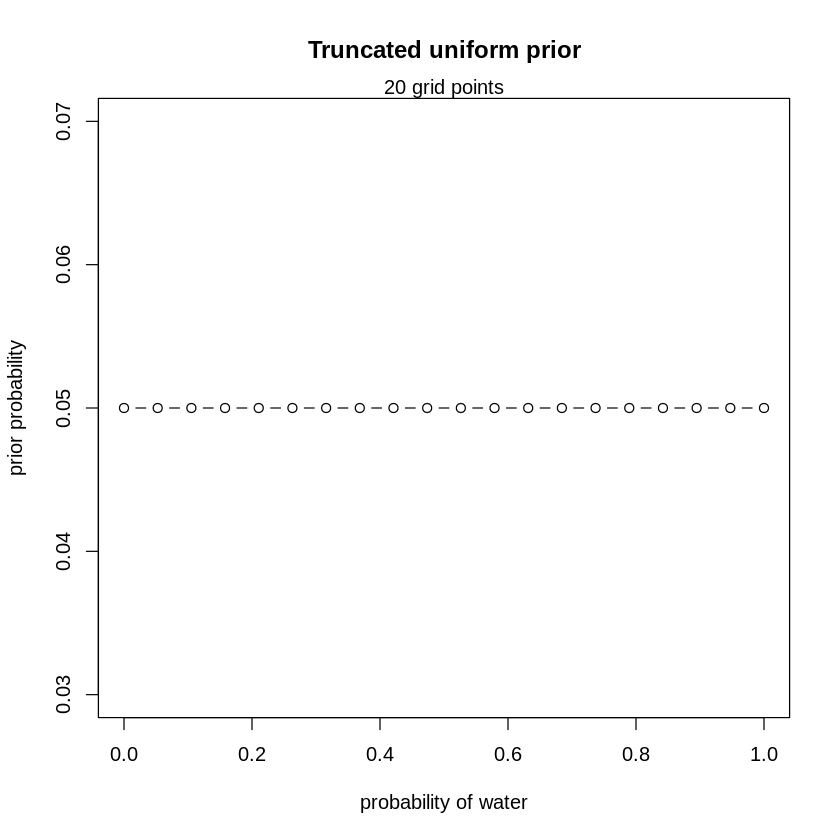

In [6]:
plot( p_grid , prior/sum(prior) , type="b" ,
    xlab="probability of water" , ylab="prior probability",
    main="Truncated uniform prior")
mtext( "20 grid points" )

Now we will plot the posterior, which we notice is also truncated.

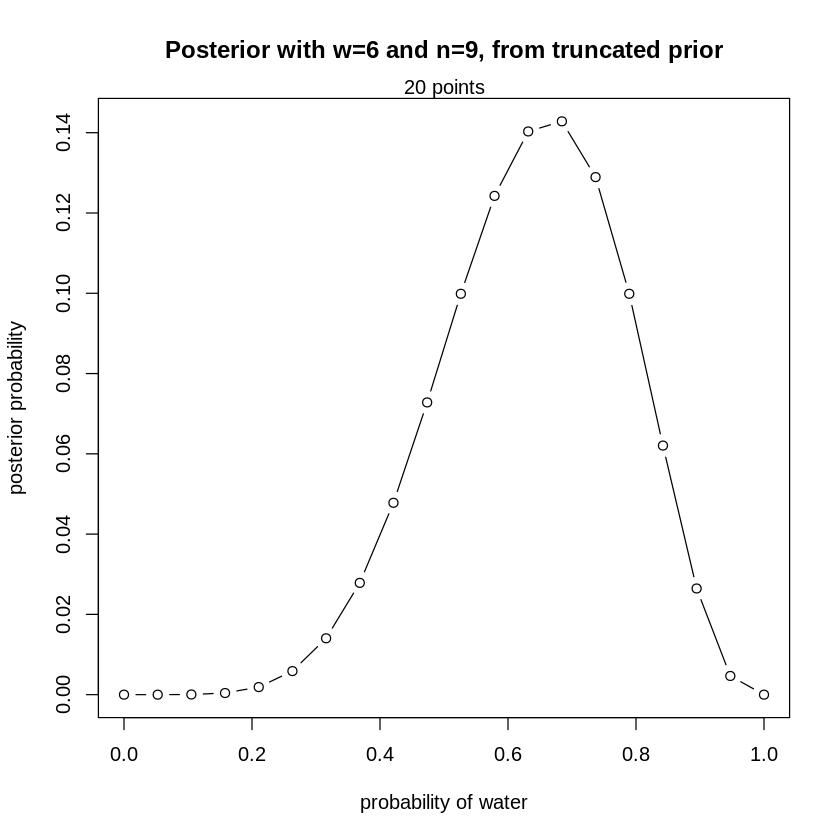

In [7]:
plot( p_grid , posterior , type="b" ,
    xlab="probability of water" , ylab="posterior probability",
    main = "Posterior with w=6 and n=9, from truncated prior" )
mtext( "20 points" )

### Double exponential prior

Next let's try a "double exponential" prior, which tails off on either side of $p = 0.5$.

In [8]:
# define prior
prior <- exp( -5*abs( p_grid - 0.5 ) )

# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

Next we plot the double exponential prior

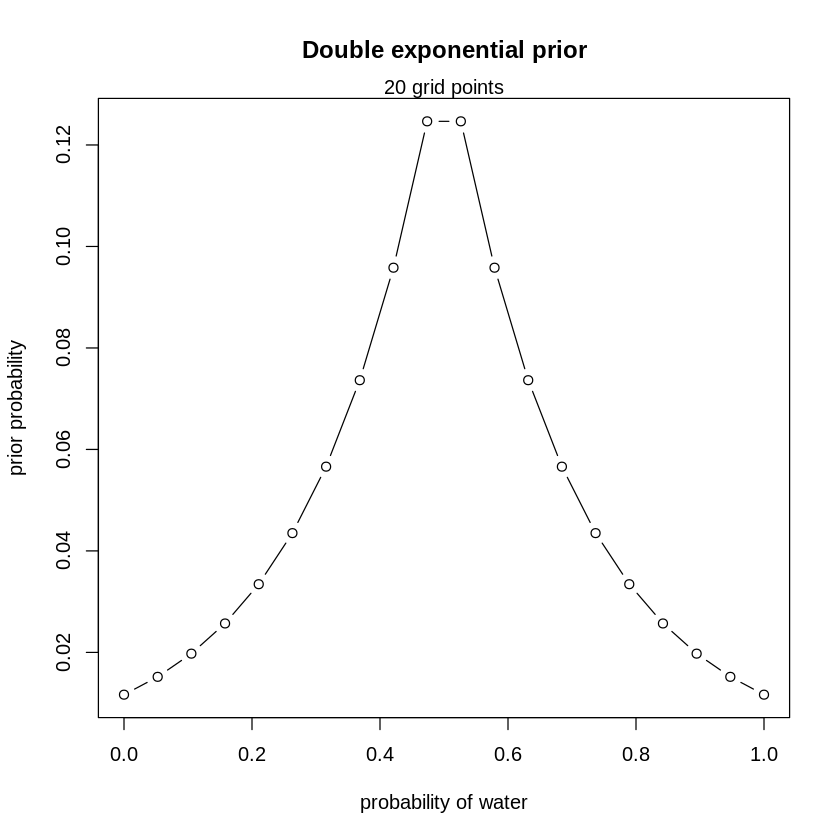

In [9]:
plot( p_grid , prior/sum(prior) , type="b" ,
    xlab="probability of water" , ylab="prior probability",
    main="Double exponential prior")
mtext( "20 grid points" )

And let's take a look at the new posterior.

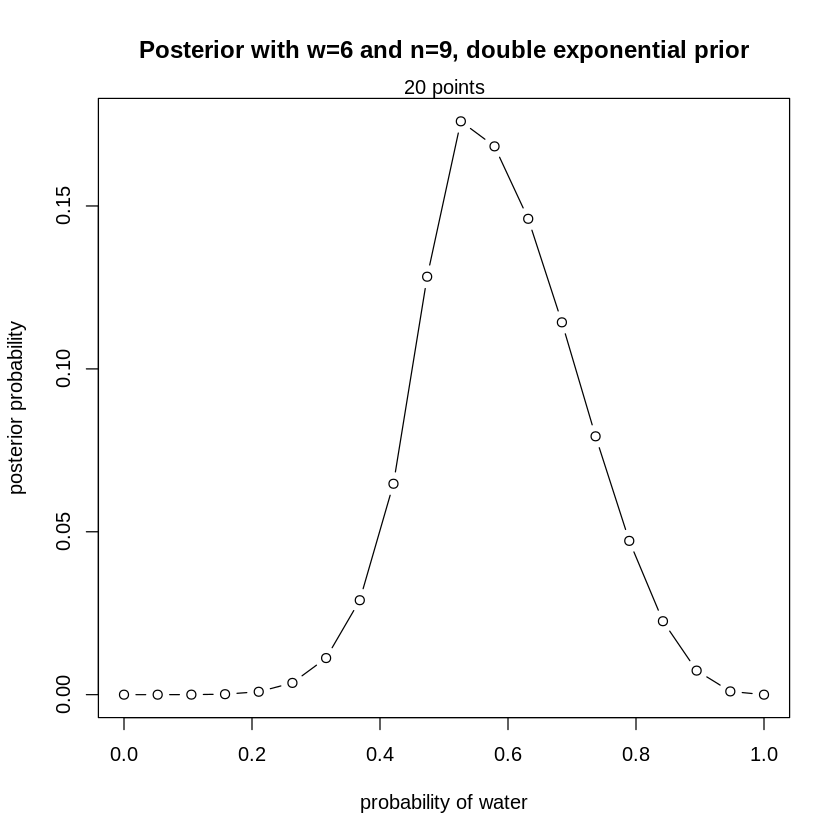

In [10]:
plot( p_grid , posterior , type="b" ,
    xlab="probability of water" , ylab="posterior probability",
    main = "Posterior with w=6 and n=9, double exponential prior")
mtext( "20 points" )

## Quadratic approximation

Grid approximation is okay, but there are fancier ways to find posteriors.  A better way is to approximate the posterior with a closely fitting bell curve.  The idea: as $n \to \infty$, the Posterior will converge $\to$ normal distribution:
$$
\text{Posterior} \to \mathrm{e}^{-(p - \mu)^2/\sigma^2}
$$
Then
$$
\ln (\text{Posterior}) \to -\frac{(p - \mu)^2}{2\sigma^2},\ (\text{a parabola})
$$
Next we use the computer to find the best fitting parabola, then estimate and report $\mu$ and $\sigma$.  This procedure is called MAP, for *Maximum a Posteriori*.

### How to do it with R

In [11]:
library(rethinking)
globe.qa <- quap(
    alist(
        W ~ dbinom( W+L, p) ,  # binomial likelihood
        p ~ dunif(0,1)         # uniform prior
    ) ,
    data=list(W=6,L=3) )

Loading required package: parallel

rethinking (Version 2.13.2)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




We stored the results of our computation in an object named `globe.qa`.  We summarize the object with the `precis()` function.

In [12]:
# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666668,0.1571337,0.4155368,0.9177969


The above output is saying that we can approximate the posterior in this problem with a normal distribution (bell curve) that has a mean of approximately 0.66 and a standard deviation approximately 0.16.  There is a whole lot more we can do with this output and a whole bunch more stored in the `globe.qa` object that we haven't discussed yet, but for many problems these kinds of computations are good enough and it is a whole lot quicker/easier than any of the other methods we will encounter.

Unfortunately, quadratic approximation is a bit limited to well-behaved models, and well-behaved data.  For some of the more complicated things you will probably be working on quadratic approximation is likely not going to be good enough---we'll see.

## Analytical posteriors

We can also find posterior distributions with mathematical methods, differential and integral calculus, and the like.  Here is what that looks like for this simple one parameter problem and a uniform prior.  The prior distribution $\pi(p)$ has the formula
$$
\pi(p) = 1,\ 0 < p < 1. \quad \text{PRIOR}
$$
And the likelihood function $f(w\vert p)$ takes the mathematical form
$$
f(w\vert p) = \binom{n}{w} p^{w}(1 - p)^{n-w},\quad \text{LIKELIHOOD}
$$
Then our Posterior distribution $\pi(p\vert w)$ is computed by means of Bayes' Rule like this:
$$
\begin{aligned}
\pi(p\vert w)\propto & \ 1\cdot\binom{n}{w}p^{w}(1-p)^{n-w},\\
\propto & \ p^{(w+1)-1}(1-p)^{(n-w+1)-1},\\
= & \ \text{Beta(df1 = $w+1$, df2 = $n-w+1$)}
\end{aligned}
$$

This so-called "Beta distribution" is a famous and popular family of models that mathematicians find convenient to get analytical solutions to Bayesian problems.


### How to do it with R

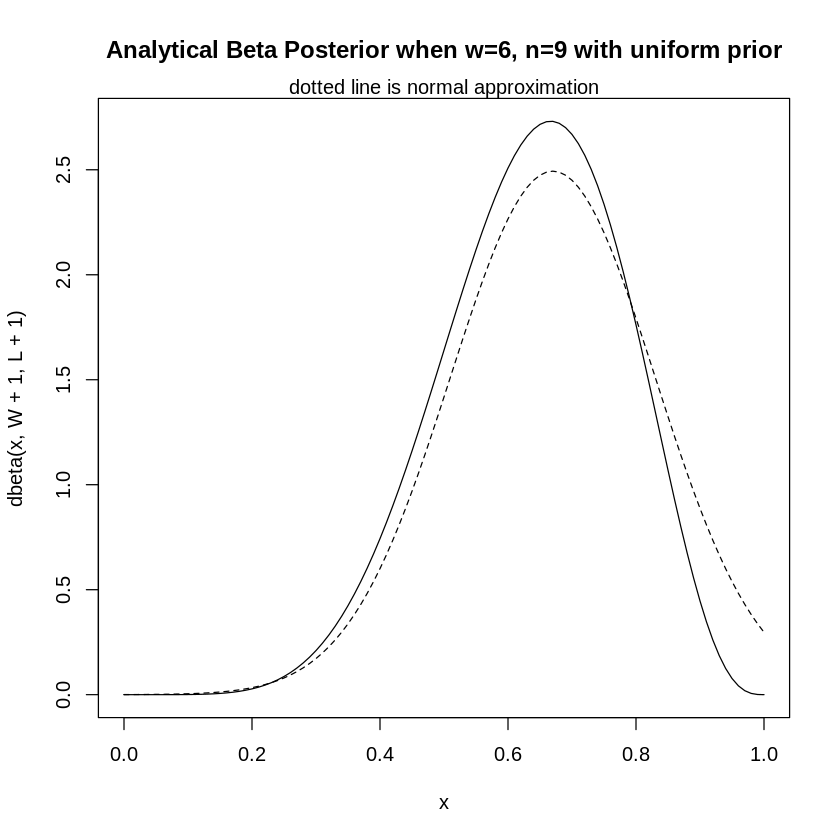

In [13]:
# analytical solution plotted out
W <- 6
L <- 3
curve( dbeta( x , W+1 , L+1 ) , from=0 , to=1, main = "Analytical Beta Posterior when w=6, n=9 with uniform prior" )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )
mtext( "dotted line is normal approximation" )

## Markov Chain Monte Carlo methods

For the hardcore stuff there will not be any analytical solutions available to us and we will need more powerful tools than grid approximation.  Furthermore, in hard problems, the normal approximation doesn't fit very well.  Enter Markov Chain Monte Carlo (MCMC) methods to the rescue.  This topic is covered in Chapter 9 of *Statistical Rethinking*.  The algorithm used below is known as the *Metropolis Algorithm*.


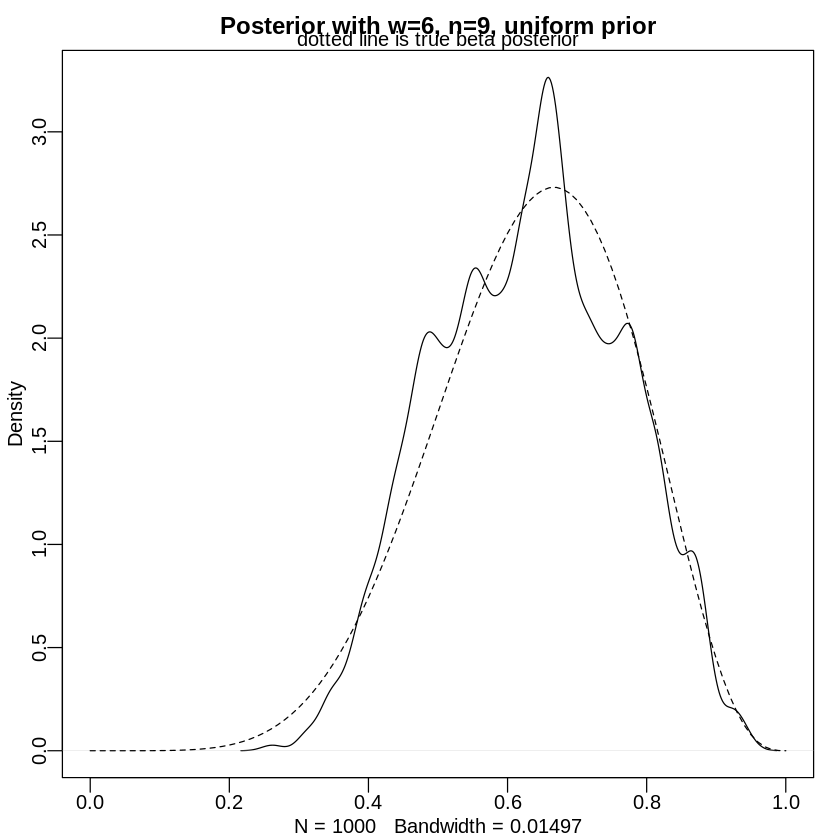

In [14]:
# Metropolis algorithm example
# basic accept-reject process
n_samples <- 1000
p <- rep( NA , n_samples )
p[1] <- 0.5
W <- 6
L <- 3
for ( i in 2:n_samples ) {
    p_new <- rnorm( 1 , p[i-1] , 0.1 )
    if ( p_new < 0 ) p_new <- abs( p_new )
    if ( p_new > 1 ) p_new <- 2 - p_new
    q0 <- dbinom( W , W+L , p[i-1] )
    q1 <- dbinom( W , W+L , p_new )
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}

## next we plot a density estimate and the theoretical curve on the same graph
dens( p , xlim=c(0,1) ,main = "Posterior with w=6, n=9, uniform prior")
curve( dbeta( x , W+1 , L+1 ) , lty=2 , add=TRUE )
mtext( "dotted line is true beta posterior" )

Look how the wiggly density curve approximates the actual, true Beta posterior shown by the dotted line.  The approximation isn't very good because the MCMC sampler only used `n_samples = 1000`.

You can rerun the code above yourself for a bunch of different values of `n_samples` to see how the density approximation gets better and better for larger values of `n_samples`.



## HMC methods and beyond...

The MCMC methods described above have been around for some decades and in recent years there has been some significant progress and major speed-ups to the methods, but this means even more parameters and requirements for even higher performance computing.  The latest trend in Bayesian statistics deals with Hamiltonian Monte Carlo (HMC) methods and a programming interface called `Stan`.  See here for more:

https://mc-stan.org/

Stan interfaces with the most popular data analysis languages (R, Python, shell, MATLAB, Julia, Stata) and runs on all major platforms (Linux, Mac, and Windows).  We very well may need Stan before it's all said and done.

## Bibliography

McElreath, R. (2018). *Statistical rethinking: A Bayesian course with examples in R and Stan.* Chapman and Hall/CRC.